<a href="https://colab.research.google.com/github/shresthshukla18/Digital-Bank-/blob/main/MSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# --- CLOUD-BASED PV ANOMALY DETECTION SETUP ---
print("🚀 Installing all dependencies...")

!pip install tensorflow keras opencv-python scikit-learn matplotlib pandas numpy seaborn efficientnet tqdm gdown

print("✅ All dependencies installed successfully!")


🚀 Installing all dependencies...
✅ All dependencies installed successfully!


In [4]:
# --- Importing Required Libraries ---
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [8]:
# --- Fix Kaggle API Key File ---
!mkdir -p ~/.kaggle
!mv "kaggle (2).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Test if Kaggle works
!kaggle datasets list -s elpv


ref                                   title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmedashrafahmed/elpv-dataset-master  elpv-dataset-master                                   90734703  2023-10-20 15:37:52.897000            147         14  0.29411766       
rubelbiswash/elpv-two-class-dataset   ELPV two class dataset                                22022686  2025-05-27 08:48:35.053000             15          0  0.25             
belalsafy/defective-solar-cells       Defective Solar Cells                                 93440666  2023-10-21 18:15:47.923000            158          7  0.23529412       
emadmous/elpv-and-pvel-ad-dataset     ELPV_and_PVEL-AD_dataset                            4393507823  2025-04-12 23:38:18.237000  

In [9]:
# --- Download and extract ELPV dataset ---
!kaggle datasets download -d ahmedashrafahmed/elpv-dataset-master
!unzip -q elpv-dataset-master.zip -d ELPV_dataset

print("✅ ELPV Dataset downloaded and extracted successfully!")


Dataset URL: https://www.kaggle.com/datasets/ahmedashrafahmed/elpv-dataset-master
License(s): unknown
  0% 0.00/86.5M [00:00<?, ?B/s]
100% 86.5M/86.5M [00:00<00:00, 1.73GB/s]
✅ ELPV Dataset downloaded and extracted successfully!


In [10]:
import os

# Verify dataset structure
for root, dirs, files in os.walk("ELPV_dataset"):
    level = root.replace("ELPV_dataset", "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 2 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")


ELPV_dataset/
  labels.csv
  images/
    images/
      cell2350.png
      cell1605.png
      cell0560.png
      cell0168.png
      cell0186.png


In [13]:
!ls /content/ELPV_dataset/

images	labels.csv


In [14]:
# --- Setup Environment ---
!pip install tensorflow efficientnet opencv-python scikit-learn matplotlib pandas tqdm
import os, numpy as np, cv2, pandas as pd, matplotlib.pyplot as plt


In [15]:
import os

# Verify dataset structure
for root, dirs, files in os.walk("ELPV_dataset"):
    level = root.replace("ELPV_dataset", "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 2 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")


ELPV_dataset/
  labels.csv
  images/
    images/
      cell2350.png
      cell1605.png
      cell0560.png
      cell0168.png
      cell0186.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


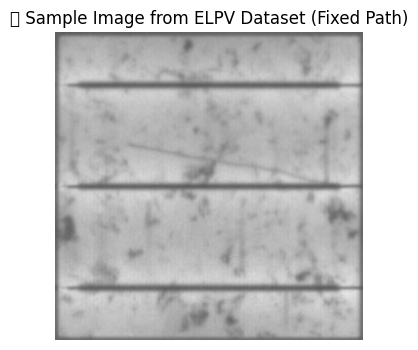

In [17]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Corrected sample image path
sample_img_path = "ELPV_dataset/images/images/" + os.listdir("ELPV_dataset/images/images")[0]

img = cv2.imread(sample_img_path)
if img is None:
    raise FileNotFoundError(f"Could not load image at {sample_img_path}")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.title("✅ Sample Image from ELPV Dataset (Fixed Path)")
plt.axis("off")
plt.show()


In [18]:
# Optional: fix nested folder structure permanently
!mv ELPV_dataset/images/images ELPV_dataset/fixed_images
!rm -r ELPV_dataset/images
!mv ELPV_dataset/fixed_images ELPV_dataset/images

print("✅ Folder structure fixed successfully!")


✅ Folder structure fixed successfully!


In [19]:
# Install required libraries
!pip install -q tensorflow efficientnet opencv-python-headless scikit-learn matplotlib pandas tqdm
print("Dependencies installed.")


Dependencies installed.


In [21]:
# --- A: Fix nested folder if present ---
import os, shutil

nested = "ELPV_dataset/images/images"
target = "ELPV_dataset/images"

if os.path.exists(nested) and not os.path.exists(os.path.join(target, os.listdir(nested)[0])):
    print("Fixing nested folder structure...")
    # move nested contents up one level
    for fname in os.listdir(nested):
        shutil.move(os.path.join(nested, fname), target)
    # remove the now-empty nested folder
    try:
        os.rmdir(nested)
    except Exception as e:
        print("Could not remove nested folder:", e)
    print("✅ Folder structure fixed: images/ contains image files now.")
else:
    print("No nested folder found or already fixed.")


No nested folder found or already fixed.


In [22]:
# --- B: Load labels.csv and create full image paths ---
import pandas as pd
import os

csv_path = "ELPV_dataset/labels.csv"
img_dir = "ELPV_dataset/images"

df = pd.read_csv(csv_path, header=None)  # no assumptions about headers
print("Raw CSV shape:", df.shape)
print("CSV head (raw):")
display(df.head())

# Heuristics to find image filename column and label column:
# The ELPV CSV often has format: ['images/cell0001.png', 1.0, 'mono']
# We'll detect the column that contains 'images/' or 'cell' strings.
img_col = None
label_col = None

for c in df.columns:
    if df[c].astype(str).str.contains(r'images/|cell\d+\.').any():
        img_col = c
    if df[c].dropna().apply(lambda x: str(x).replace('.0','').isdigit()).all() and label_col is None:
        # numeric-looking column -> candidate label
        label_col = c

print("Detected image column:", img_col)
print("Detected label column:", label_col)

# If detection failed, try common fallbacks:
if img_col is None:
    # maybe the first column is fine
    img_col = df.columns[0]
if label_col is None:
    # try second column if exists
    if len(df.columns) > 1:
        label_col = df.columns[1]
    else:
        raise ValueError("Could not detect label column in labels.csv — open the CSV and tell me its columns.")

# Build a cleaned dataframe
clean = pd.DataFrame()
clean['relpath'] = df[img_col].astype(str).str.strip()
# Some relpaths may already be like 'images/cell0001.png' or 'cell0001.png'
# Normalize by taking basename
clean['filename'] = clean['relpath'].apply(lambda p: os.path.basename(p))
clean['full_path'] = clean['filename'].apply(lambda f: os.path.join(img_dir, f))

# Labels: convert to int (0/1)
clean['label'] = df[label_col].astype(float).astype(int)

# Quick existence check
missing = clean[~clean['full_path'].apply(os.path.exists)]
print(f"\nTotal images listed: {len(clean)}")
print("Missing files count:", missing.shape[0])
if missing.shape[0] > 0:
    print("Example missing entries:")
    display(missing.head())

# Show cleaned head
print("\nCleaned dataframe head:")
display(clean.head())


Raw CSV shape: (2624, 1)
CSV head (raw):


,0
0,images/cell0001.png 1.0 mono
1,images/cell0002.png 1.0 mono
2,images/cell0003.png 1.0 mono
3,images/cell0004.png 0.0 mono
4,images/cell0005.png 1.0 mono


Detected image column: 0
Detected label column: None


ValueError: Could not detect label column in labels.csv — open the CSV and tell me its columns.

In [23]:
# View first few lines of the raw CSV
!head -10 ELPV_dataset/labels.csv


images/cell0001.png  1.0                 mono
images/cell0002.png  1.0                 mono
images/cell0003.png  1.0                 mono
images/cell0004.png  0.0                 mono
images/cell0005.png  1.0                 mono
images/cell0006.png  1.0                 mono
images/cell0007.png  1.0                 mono
images/cell0008.png  1.0                 mono
images/cell0009.png  0.0                 mono
images/cell0010.png  1.0                 mono


In [24]:
import pandas as pd
import re

# Read CSV with flexible whitespace separator
df = pd.read_csv("ELPV_dataset/labels.csv",
                 sep=r"\s+",        # split on one or more spaces
                 header=None,       # no header in file
                 names=["filename", "label", "mode"])  # assign column names

# Show first few rows
print("✅ Cleaned DataFrame:")
display(df.head())

# Check shape and missing values
print(f"\nTotal samples: {df.shape[0]}")
print(f"Missing values:\n{df.isnull().sum()}")


✅ Cleaned DataFrame:


,filename,label,mode
0,images/cell0001.png,1.0,mono
1,images/cell0002.png,1.0,mono
2,images/cell0003.png,1.0,mono
3,images/cell0004.png,0.0,mono
4,images/cell0005.png,1.0,mono



Total samples: 2624
Missing values:
filename    0
label       0
mode        0
dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

# Step 2: Split dataset
train_df, temp_df = train_test_split(df, test_size=0.3, random_state=42, stratify=df['label'])
val_df, test_df = train_test_split(temp_df, test_size=0.3333, random_state=42, stratify=temp_df['label'])

print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")
print(f"Test samples: {len(test_df)}")

# Optional: Verify label balance
print("\nLabel distribution (train):")
print(train_df['label'].value_counts(normalize=True))

print("\nLabel distribution (val):")
print(val_df['label'].value_counts(normalize=True))

print("\nLabel distribution (test):")
print(test_df['label'].value_counts(normalize=True))


Training samples: 1836
Validation samples: 525
Test samples: 263

Label distribution (train):
label
0.000000    0.574619
1.000000    0.272331
0.333333    0.112745
0.666667    0.040305
Name: proportion, dtype: float64

Label distribution (val):
label
0.000000    0.575238
1.000000    0.272381
0.333333    0.112381
0.666667    0.040000
Name: proportion, dtype: float64

Label distribution (test):
label
0.000000    0.574144
1.000000    0.273764
0.333333    0.110266
0.666667    0.041825
Name: proportion, dtype: float64


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers

# Step 3: Preprocessing pipeline

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Function to load and preprocess images from filenames
def load_and_preprocess_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32) / 255.0  # normalize
    return img, label

# Convert DataFrames to tf.data datasets
def df_to_dataset(dataframe, shuffle=True):
    paths = dataframe['filename'].values
    labels = dataframe['label'].values.astype('float32')
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
    return ds

train_ds = df_to_dataset(train_df)
val_ds = df_to_dataset(val_df, shuffle=False)
test_ds = df_to_dataset(test_df, shuffle=False)

# Augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

print("✅ Data pipeline ready — with augmentation, normalization & batching!")


✅ Data pipeline ready — with augmentation, normalization & batching!


In [27]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# Step 4: Build Model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(4, activation='softmax')(x)  # 4 classes in dataset

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
print("\n✅ EfficientNetB0 model successfully built and compiled!")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)


✅ EfficientNetB0 model successfully built and compiled!


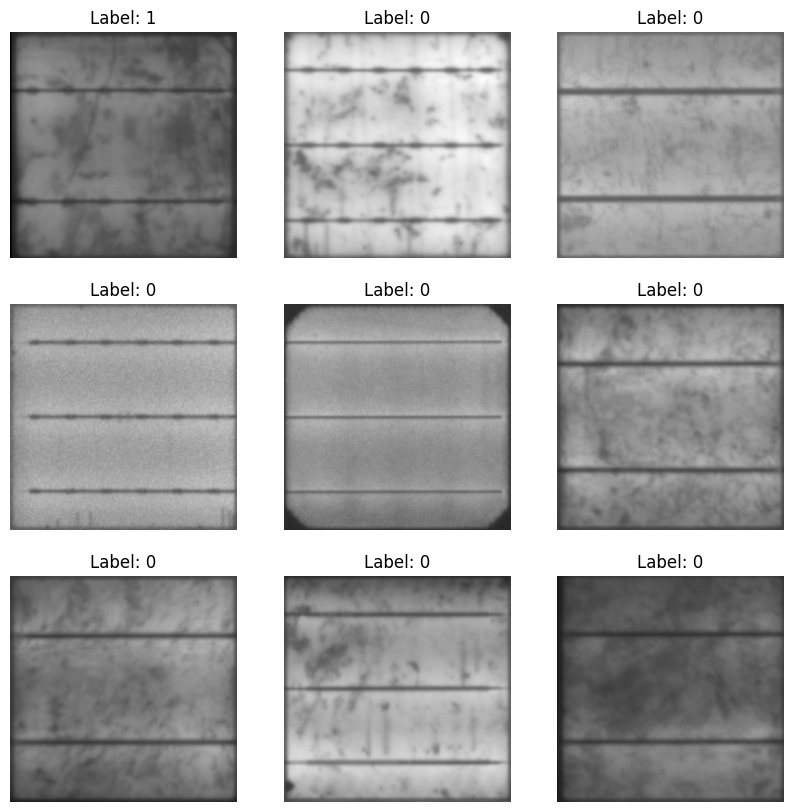

In [44]:
import matplotlib.pyplot as plt

for images, labels in dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {int(labels[i].numpy())}")
        plt.axis("off")
    plt.show()


Sample images

In [51]:
import os

missing = [f for f in df_balanced['filename'] if not os.path.exists(f)]
print(f"Missing files: {len(missing)}")


Missing files: 0


In [53]:
import pandas as pd

df = pd.read_csv("ELPV_dataset/labels.csv")
print("✅ Columns in CSV:", df.columns.tolist())
print(df.head())


✅ Columns in CSV: ['images/cell0001.png  1.0                 mono']
   images/cell0001.png  1.0                 mono
0  images/cell0002.png  1.0                 mono
1  images/cell0003.png  1.0                 mono
2  images/cell0004.png  0.0                 mono
3  images/cell0005.png  1.0                 mono
4  images/cell0006.png  1.0                 mono


In [54]:
import pandas as pd

# Read CSV correctly using whitespace separator
df = pd.read_csv("ELPV_dataset/labels.csv",
                 sep=r"\s+",
                 header=None,
                 names=["filename", "label", "type"])

# Prepend the correct path to filenames
df["filename"] = df["filename"].apply(lambda x: f"ELPV_dataset/{x}")

# Show confirmation
print(df.head())
print("\n✅ Columns:", df.columns.tolist())


                           filename  label  type
0  ELPV_dataset/images/cell0001.png    1.0  mono
1  ELPV_dataset/images/cell0002.png    1.0  mono
2  ELPV_dataset/images/cell0003.png    1.0  mono
3  ELPV_dataset/images/cell0004.png    0.0  mono
4  ELPV_dataset/images/cell0005.png    1.0  mono

✅ Columns: ['filename', 'label', 'type']


In [55]:
from sklearn.utils import resample

# Keep only binary labels
df_binary = df[df["label"].isin([0.0, 1.0])]

# Separate classes
df_majority = df_binary[df_binary["label"] == 0.0]
df_minority = df_binary[df_binary["label"] == 1.0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine back
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle for randomness
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Before balancing:\n", df_binary["label"].value_counts(), "\n")
print("After balancing:\n", df_balanced["label"].value_counts())


Before balancing:
 label
0.0    1508
1.0     715
Name: count, dtype: int64 

After balancing:
 label
0.0    1508
1.0    1508
Name: count, dtype: int64


In [57]:
# Convert numeric labels (0.0, 1.0) → strings ("0", "1")
df_balanced['label'] = df_balanced['label'].astype(str)


In [59]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# --- Load EfficientNetB0 base ---
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers (feature extractor only)
for layer in base_model.layers:
    layer.trainable = False

# --- Build classification head ---
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# --- Combine model ---
model = Model(inputs=base_model.input, outputs=output)

# --- Compile model ---
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,213,668 (16.07 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [63]:
from sklearn.model_selection import train_test_split

# Split the balanced dataframe into train and validation sets (80-20 split)
df_train, df_val = train_test_split(df_balanced, test_size=0.2, random_state=42, stratify=df_balanced['label'])

print(f"Train samples: {len(df_train)}, Validation samples: {len(df_val)}")


Train samples: 2412, Validation samples: 604


In [64]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
).flow_from_dataframe(
    df_train, x_col='filename', y_col='label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_dataframe(
    df_val, x_col='filename', y_col='label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32
)


Found 2412 validated image filenames belonging to 2 classes.
Found 604 validated image filenames belonging to 2 classes.


In [65]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [66]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,   # increase epochs
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.5941 - loss: 0.6597

76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 853ms/step - accuracy: 0.5949 - loss: 0.6591 - val_accuracy: 0.7334 - val_loss: 0.5418
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.7431 - loss: 0.5217

76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 414ms/step - accuracy: 0.7432 - loss: 0.5216 - val_accuracy: 0.7997 - val_loss: 0.4862
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.7509 - loss: 0.4978

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 430ms/step - accuracy: 0.7512 - loss: 0.4976 - val_accuracy: 0.7765 - val_loss: 0.4622
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.7623 - loss: 0.4822

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 417ms/step - accuracy: 0.7623 - loss: 0.4821 - val_accuracy: 0.8013 - val_loss: 0.4367
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.7798 - loss: 0.4533

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 422ms/step - accuracy: 0.7797 - loss: 0.4533 - val_accuracy: 0.7997 - val_loss: 0.4255
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.7840 - loss: 0.4443

76/76 ━━━━━━━━━━━━━━━━━━━━ 34s 445ms/step - accuracy: 0.7840 - loss: 0.4442 - val_accuracy: 0.8162 - val_loss: 0.4123
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 426ms/step - accuracy: 0.7984 - loss: 0.4320 - val_accuracy: 0.8013 - val_loss: 0.4138
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.7981 - loss: 0.4321

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 430ms/step - accuracy: 0.7981 - loss: 0.4320 - val_accuracy: 0.8129 - val_loss: 0.3972
Epoch 9/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.7828 - loss: 0.4282

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 429ms/step - accuracy: 0.7830 - loss: 0.4280 - val_accuracy: 0.8179 - val_loss: 0.3934
Epoch 10/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 409ms/step - accuracy: 0.7893 - loss: 0.4323 - val_accuracy: 0.8129 - val_loss: 0.3937
Epoch 11/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.8118 - loss: 0.4019

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 427ms/step - accuracy: 0.8118 - loss: 0.4019 - val_accuracy: 0.8278 - val_loss: 0.3803
Epoch 12/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.8074 - loss: 0.4090

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 415ms/step - accuracy: 0.8075 - loss: 0.4089 - val_accuracy: 0.8245 - val_loss: 0.3794
Epoch 13/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 423ms/step - accuracy: 0.7843 - loss: 0.4255 - val_accuracy: 0.8262 - val_loss: 0.3836
Epoch 14/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.7972 - loss: 0.4072

76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 414ms/step - accuracy: 0.7973 - loss: 0.4072 - val_accuracy: 0.8328 - val_loss: 0.3758
Epoch 15/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - accuracy: 0.8209 - loss: 0.3806 - val_accuracy: 0.8262 - val_loss: 0.3772
Epoch 16/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8112 - loss: 0.3936

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 416ms/step - accuracy: 0.8111 - loss: 0.3937 - val_accuracy: 0.8377 - val_loss: 0.3705
Epoch 17/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 418ms/step - accuracy: 0.8217 - loss: 0.3815 - val_accuracy: 0.8295 - val_loss: 0.3744
Epoch 18/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8164 - loss: 0.4022

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - accuracy: 0.8163 - loss: 0.4021 - val_accuracy: 0.8311 - val_loss: 0.3684
Epoch 19/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8136 - loss: 0.3924

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 419ms/step - accuracy: 0.8136 - loss: 0.3924 - val_accuracy: 0.8411 - val_loss: 0.3633
Epoch 20/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.8269 - loss: 0.3834

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 434ms/step - accuracy: 0.8268 - loss: 0.3835 - val_accuracy: 0.8411 - val_loss: 0.3611
Epoch 21/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 411ms/step - accuracy: 0.8163 - loss: 0.3842 - val_accuracy: 0.8295 - val_loss: 0.3647
Epoch 22/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.8082 - loss: 0.4034

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 430ms/step - accuracy: 0.8082 - loss: 0.4034 - val_accuracy: 0.8394 - val_loss: 0.3593
Epoch 23/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8223 - loss: 0.3738

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 417ms/step - accuracy: 0.8221 - loss: 0.3741 - val_accuracy: 0.8344 - val_loss: 0.3582
Epoch 24/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.7939 - loss: 0.4149

76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 431ms/step - accuracy: 0.7942 - loss: 0.4145 - val_accuracy: 0.8377 - val_loss: 0.3566
Epoch 25/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 409ms/step - accuracy: 0.8176 - loss: 0.3810 - val_accuracy: 0.8427 - val_loss: 0.3572
Epoch 26/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 423ms/step - accuracy: 0.8274 - loss: 0.3806 - val_accuracy: 0.8411 - val_loss: 0.3568
Epoch 27/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 414ms/step - accuracy: 0.8045 - loss: 0.3850 - val_accuracy: 0.8278 - val_loss: 0.3598
Epoch 28/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 42s 424ms/step - accuracy: 0.8290 - loss: 0.3727 - val_accuracy: 0.8262 - val_loss: 0.3597
Epoch 29/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 406ms/step - accuracy: 0.8220 - loss: 0.3885 - val_accuracy: 0.8460 - val_loss: 0.3586


In [67]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=callbacks
)


Epoch 1/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 85s 736ms/step - accuracy: 0.7135 - loss: 0.5526 - val_accuracy: 0.8212 - val_loss: 0.3818
Epoch 2/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 423ms/step - accuracy: 0.7611 - loss: 0.4906 - val_accuracy: 0.8245 - val_loss: 0.3829
Epoch 3/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 31s 411ms/step - accuracy: 0.7670 - loss: 0.4622 - val_accuracy: 0.8328 - val_loss: 0.3778
Epoch 4/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 430ms/step - accuracy: 0.7992 - loss: 0.4217 - val_accuracy: 0.8311 - val_loss: 0.3731
Epoch 5/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 418ms/step - accuracy: 0.8060 - loss: 0.4284 - val_accuracy: 0.8361 - val_loss: 0.3673
Epoch 6/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 417ms/step - accuracy: 0.8229 - loss: 0.3953 - val_accuracy: 0.8361 - val_loss: 0.3599
Epoch 7/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8054 - loss: 0.4132

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 429ms/step - accuracy: 0.8054 - loss: 0.4132 - val_accuracy: 0.8377 - val_loss: 0.3534
Epoch 8/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.7849 - loss: 0.4387

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 417ms/step - accuracy: 0.7852 - loss: 0.4384 - val_accuracy: 0.8361 - val_loss: 0.3495
Epoch 9/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.8038 - loss: 0.4099

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 432ms/step - accuracy: 0.8038 - loss: 0.4097 - val_accuracy: 0.8295 - val_loss: 0.3453
Epoch 10/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.7947 - loss: 0.4167

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 425ms/step - accuracy: 0.7948 - loss: 0.4165 - val_accuracy: 0.8278 - val_loss: 0.3419
Epoch 11/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.8059 - loss: 0.3840

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 417ms/step - accuracy: 0.8059 - loss: 0.3839 - val_accuracy: 0.8262 - val_loss: 0.3395
Epoch 12/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.8342 - loss: 0.3658

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 427ms/step - accuracy: 0.8342 - loss: 0.3659 - val_accuracy: 0.8262 - val_loss: 0.3365
Epoch 13/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.8169 - loss: 0.3798

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 419ms/step - accuracy: 0.8170 - loss: 0.3796 - val_accuracy: 0.8245 - val_loss: 0.3328
Epoch 14/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.8381 - loss: 0.3553

76/76 ━━━━━━━━━━━━━━━━━━━━ 33s 431ms/step - accuracy: 0.8380 - loss: 0.3555 - val_accuracy: 0.8295 - val_loss: 0.3288
Epoch 15/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.8194 - loss: 0.3810

76/76 ━━━━━━━━━━━━━━━━━━━━ 32s 420ms/step - accuracy: 0.8195 - loss: 0.3807 - val_accuracy: 0.8278 - val_loss: 0.3267


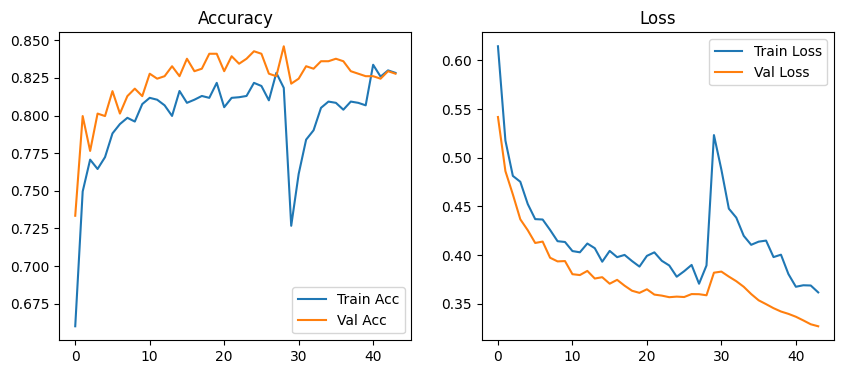

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 450ms/step
📊 Classification Report:

              precision    recall  f1-score   support

   Defective       0.49      0.58      0.53       302
     Healthy       0.48      0.38      0.43       302

    accuracy                           0.48       604
   macro avg       0.48      0.48      0.48       604
weighted avg       0.48      0.48      0.48       604



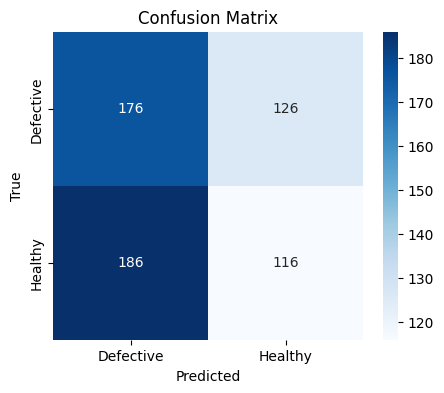


✅ Overall Accuracy: 48.34%


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Get true and predicted labels ---
# Make sure you have a validation generator called 'val_gen'
val_gen.reset()
predictions = model.predict(val_gen, verbose=1)

# Convert predictions to binary (0/1)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = val_gen.classes

# --- Step 2: Generate classification report ---
print("📊 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=['Defective', 'Healthy']))

# --- Step 3: Compute confusion matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Defective', 'Healthy'], yticklabels=['Defective', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# --- Step 4: Compute overall accuracy ---
accuracy = np.mean(y_true == y_pred)
print(f"\n✅ Overall Accuracy: {accuracy*100:.2f}%")
